- Data Preparation
- Visualisation
- Create Train and Test Set
- Create a Logistic Regression Model
- Predictions
- Decision Boundary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Generate data using Numpy

In [2]:
# np.random.multivariate_normal?

In [3]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.2, 0.1], [0.1, 1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_02)

[[4.31405201 5.03161084]
 [3.70190244 4.90246998]
 [4.46936328 4.69140253]
 [2.24260586 4.98643748]
 [4.71001876 6.92160732]
 [5.34205909 4.70982911]
 [1.94783912 5.06694007]
 [4.67557267 4.91724654]
 [6.60232199 6.01990353]
 [4.23221552 5.97505456]
 [4.31192858 3.36689482]
 [4.8041403  3.86594979]
 [4.36864198 5.55135604]
 [4.42776055 6.09827382]
 [3.61728697 5.89587215]
 [3.41833548 6.20665383]
 [5.05272    6.06338554]
 [4.34536235 5.0909674 ]
 [4.62642802 4.92431029]
 [4.35360367 5.27032888]
 [5.61423483 4.02767409]
 [4.1413904  5.41633637]
 [6.54732401 5.9015615 ]
 [5.31587163 3.79755465]
 [1.89006161 4.17008555]
 [3.68872563 4.89699947]
 [6.02926186 5.43176828]
 [3.41956784 5.59132952]
 [5.45774007 4.18639973]
 [3.71563826 4.2199274 ]
 [2.6601085  5.24396528]
 [3.11349435 4.57638299]
 [4.1570022  4.886443  ]
 [3.78899999 4.49638299]
 [5.61299593 6.6627558 ]
 [6.21654307 5.75902055]
 [5.43270094 6.24813529]
 [3.90479168 2.56050446]
 [1.70191778 6.67400952]
 [4.12537932 6.16441373]


In [4]:
print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


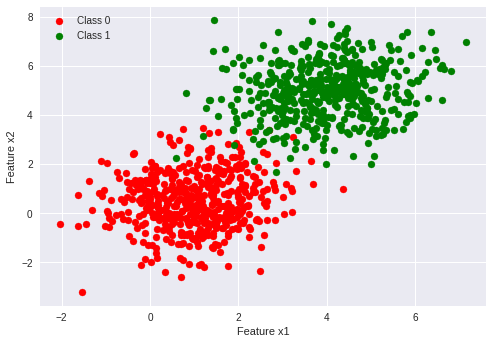

In [5]:
plt.style.use('seaborn')
plt.scatter(dist_01[:, 0], dist_01[:, 1], color = 'red', label = 'Class 0')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color = 'green', label = 'Class 1')
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

In [6]:
m = dist_01.shape[0] + dist_02.shape[0]
n = dist_01.shape[1]
data = np.zeros((m, n + 1))
data[:500, :2] = dist_01
data[500:, :2] = dist_02
data[500:, -1] = 1
# data[:500, -1] = 0
print(data.shape)

(1000, 3)


In [7]:
np.random.shuffle(data)
print(data[:10])

[[ 3.68872563  4.89699947  1.        ]
 [ 4.58804731  4.43799381  1.        ]
 [ 0.10813155  1.91842144  0.        ]
 [-0.22703061  1.15786425  0.        ]
 [ 2.25386036  4.06954543  1.        ]
 [ 2.20645769  0.28842637  0.        ]
 [ 4.45766991  7.01136158  1.        ]
 [ 1.32482024  4.60901558  1.        ]
 [ 3.84065218  5.65191081  1.        ]
 [ 2.89125832  4.6672568   1.        ]]


In [8]:
split = int(0.8 * data.shape[0])

X_train = data[:split, :2]
Y_train = data[:split, -1]
X_test = data[split:, :2]
Y_test = data[split:, -1]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


### Plotting and normalising data

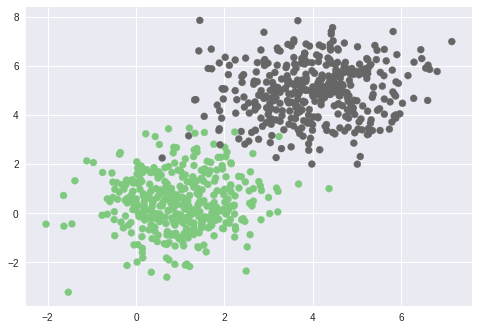

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, cmap = plt.cm.Accent)
# c is sequence of 0s and 1s. Color will be allocated acc. to sequence
plt.show()

In [10]:
# Data Normalisation

In [11]:
x_mean = X_train.mean(axis = 0)
x_std = X_train.std(axis = 0)

# Apply the same Transformation on test data
X_train = (X_train - x_mean) / x_std

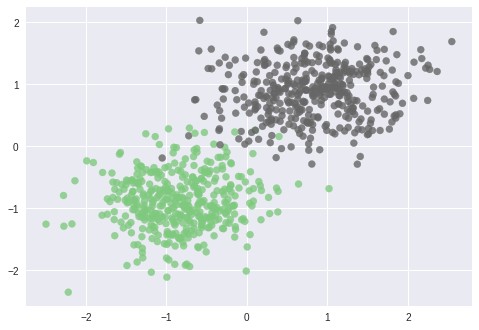

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, cmap = plt.cm.Accent, alpha = 0.8)
plt.show()

# Logistic Regression Implementation

In [13]:
def sigmoid(x) :
    return 1.0 / (1.0 + np.exp(-x))

In [14]:
def hypothesis(X, theta) :
    '''
        X - entire array (m, n + 1) [1s at beginning]
        theta - np.array (n + 1, 1)
    '''
    return sigmoid(np.dot(X, theta))

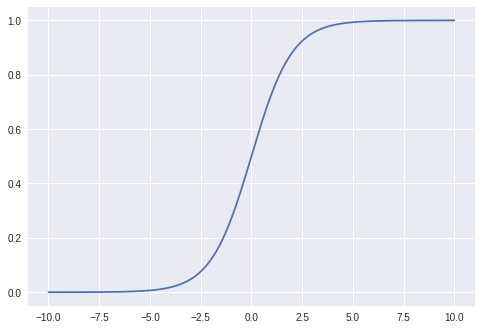

In [15]:
a = np.linspace(-10, 10, 500)
plt.plot(a, sigmoid(a))
plt.show()

In [16]:
def error(X, y, theta) :
    '''
    params :
        X - (m, n + 1)
        y - (m, 1)
        theta - (n + 1, 1)
    return :
        scalar_value = (log) loss (or binary cross entropy)
    '''
    h = hypothesis(X, theta)
    e = (y * np.log(h)) + (1 - y) * (1 - np.log(h)) # element-wise multiplication
    return -np.mean(e)

In [17]:
def gradient(X, y, theta) :
    '''
    params :
        X - (m, n + 1)
        y - (m, 1)
        theta - (n + 1, 1)
    return :
        gradient_vector - (n + 1, 1)
    '''
    h = hypothesis(X, theta)
    m = X.shape[0]
    return -np.dot(X.T, (y - h)) / m

In [18]:
def gradient_descent(X, y, lr = 0.1, max_iter = 500) :
    m, n = X.shape
    theta = np.zeros((n, 1))
    
    error_list = []
    
    for i in range(max_iter) :
        err = error(X, y, theta)
        error_list.append(err)
        grad = gradient(X, y, theta)
        theta = theta - lr * grad
        
    return (theta, error_list)

In [19]:
print(X_train.shape)

(800, 2)


In [20]:
ones = np.ones((X_train.shape[0], 1))
X_new_train = np.hstack((ones, X_train))
print(X_new_train.shape)
print(X_new_train[:5])
Y_train = Y_train.reshape((-1, 1))

(800, 3)
[[ 1.          0.65039045  0.86233723]
 [ 1.          1.14469471  0.68017603]
 [ 1.         -1.31765164 -0.31974263]
 [ 1.         -1.50187058 -0.62157771]
 [ 1.         -0.13827064  0.53395343]]


In [21]:
theta, error_list = gradient_descent(X_new_train, Y_train)

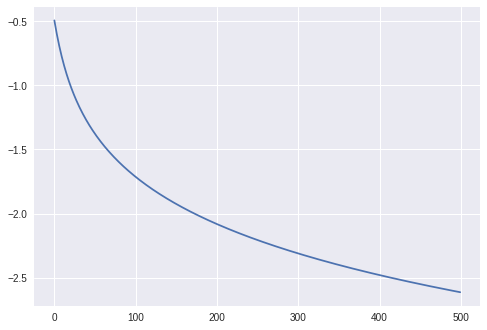

In [22]:
plt.plot(error_list)
plt.show()

In [23]:
print(theta)

[[0.07909389]
 [2.13979168]
 [2.85145548]]


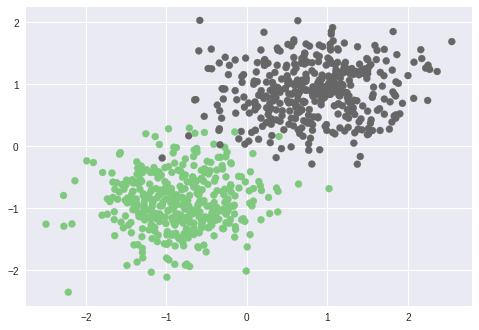

In [25]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train.reshape((-1, 1)), cmap = plt.cm.Accent)
plt.show()

theta0 + theta1 * x1 + theta2 * x2 = 0 --> for decision boundary  
=> x2(y-axis) = - (theta0 / theta2) - x1 * (theta1 / theta2)

In [28]:
x1 = np.linspace(-3, 3, 10)
x2 = -(theta[0] + theta[1] * x1) / theta[2]

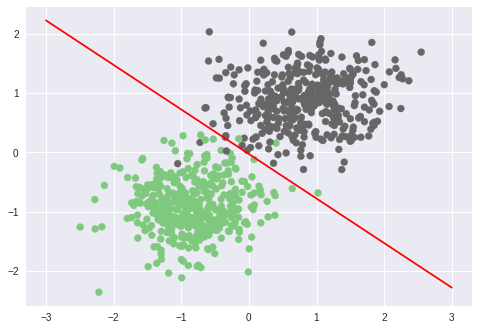

In [29]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train.reshape((-1, 1)), cmap = plt.cm.Accent)
plt.plot(x1, x2, color = 'red')
plt.show()